# Chapter 1 exercises in Neural Encoding
### Info
%plot inline, is used in the first box, because it tells the kernel to plot the graphs inside the notebook. If you want the plots to appear in widows, then change to %plot native.

## Homogeneous Poisson firing
The firing rate in this example is set to be 100Hz and the total trial duration is set to 10 seconds.

In [42]:
%plot inline

In [59]:
%Variable definition
r = 100; %Firing rate in Hz (constant in case of homogeneous Poisson)
dt = 1e-3; %Time step set to 1ms (it has to be less than 1/r)
T = 100; %Trial duration in seconds
bin_size = 1; %Bin size used in plotting the histogram of interpsike intervals

In [44]:
%Generate the spikes (randomly) and save the time of occurance for each
time_stp = 0:dt:T; %Create the time step vector
spikes = rand(size(time_stp)) < r*dt; %Generate the spikes
times = time_stp(spikes); %Save the time in seconds for each spike

In [45]:
spk_int = times(2:size(times, 2)) - times(1:(size(times, 2) - 1)); %Calculate the interspike intervals

In [46]:
%Generate some spike trains for many trials
num_trial = 15; %Generate trains for the specified number of trials
time_vec = 0:dt:1; %Generate a time vector for a trial duration of 1000 seconds
spike_trains = zeros(num_trial, length(time_vec)); %Allocate space for the array

for i = 1:num_trial
    spike_trains(i, :) = rand(size(time_vec)) < r*dt; %Generate the spikes with a Poisson proccess
end

In [47]:
%Calculate the coefficient of variation of interspike interval Cv 
% which is the ratio of the standard deviation to the mean of interspike intervals
avg_t = mean(spk_int); %Mean of interspike intervals
std_t = sqrt(var(spk_int)); %Standard deviation
Cv = std_t/avg_t; %Interspike interval variance coefficient

In [48]:
%Fano factor calculation for counting intervals from 1 to 100ms
int_start = 1; %The start of the interval
int_end = 100; %The stop of the interval

fano_fc = zeros((int_end - int_start + 1), 1); %Fano factor array initialization
mean_n = zeros((int_end - int_start + 1), 1); %Mean count array initialization
var_n = zeros((int_end - int_start + 1), 1); %Variance count array initialization

for i = int_start:int_end
    mean_n(i) = sum(arrayfun(@(j) mean(spikes(j:(j + i))), 1:i:(length(spikes) - i))); %Get the spike mean
    var_n(i) = sum(arrayfun(@(j) var(spikes(j:(j + i))), 1:i:(length(spikes) - i))); %Get the spike variance
    fano_fc(i) = var_n(i)/mean_n(i); %Save the fano factor
end

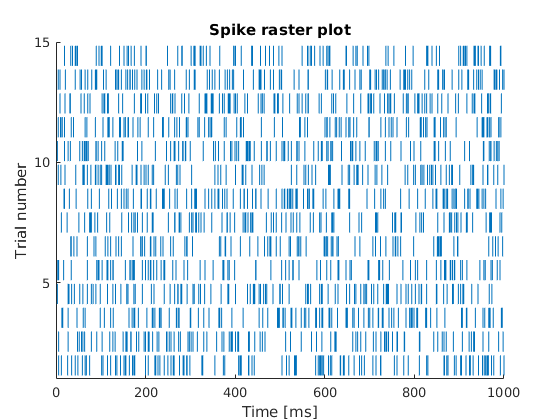

In [49]:
%Raster plot some spikes to visualize the proccess of spiking
%We use the variable num_trial defined above
axes('position', [0.1, 0.1, 0.8, 0.8]);
axis([0, length(spike_trains), 1, num_trial]);
set(gca, 'YTick', 0:5:num_trial); %Set the y-axis numbers to integers
ticMargin = num_trial*0.01; %Gap between spike trains
ticHeight = (num_trial - (num_trial + 1) * ticMargin) / num_trial;

for train = 1:num_trial
    spikeTimes = find(spike_trains(train, :) == 1);
    yOffset = ticMargin + (train - 1) * (ticMargin + ticHeight);
    for i = 1:length(spikeTimes)
        line([spikeTimes(i), spikeTimes(i)], [yOffset, yOffset + ticHeight]);
    end
end

xlabel('Time [ms]');
ylabel('Trial number');
title('Spike raster plot');

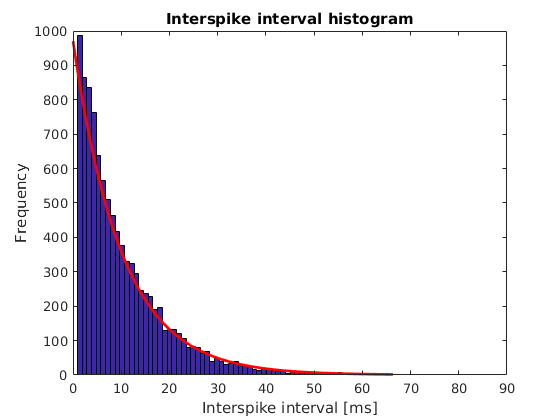

In [50]:
%Plot the interspike interval histogram in ms
histfit(spk_int*1000, ceil(max(spk_int*1000)), 'exponential');
title('Interspike interval histogram');
xlabel('Interspike interval [ms]');
ylabel('Frequency');

In [51]:
pd = fitdist((spk_int')*1000, 'exponential') %Get the fit parameters for the fitted curve in the histogram above


pd = 

  ExponentialDistribution

  Exponential distribution
    mu = 10.0406   [9.84625, 10.2407]



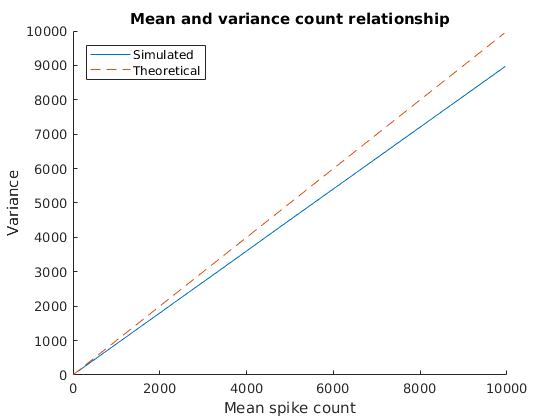

In [52]:
%Plot the relationship between the mean count and the variance count
%Those counts are done from int_start to int_stop, defined above

%Used in plotting the theoretical line, which is y = x
x = 0:10:(max(mean_n) - 20); %Genberate points for the theoretical line (the deduction is made to avoid overshooting)

hold on; %Enable multiple line plotting
plot(mean_n, var_n); %Plot the simulated values
plot(x, x, '--'); %Plot a dashed theoretical line
hold off; %Disable multiple line plotting
title('Mean and variance count relationship'); %Add a title to the graph
xlabel('Mean spike count'); %Attach a label to the x-axis
ylabel('Variance'); %Also attach a label to the y-axis
legend('Simulated', 'Theoretical', 'Location', 'northwest'); %Show the legend to make clear what the lines are

## Inhomogeneous Poisson firing

In [53]:
%Set the variables for the inhomogeneous spikes
ocur_time = 0; %Time of spike occurance
first_spk = 1; %First spike in sequence indicator
ref_delay = 10; %Set the refractory period delay for the model

In [60]:
%Generate inhomogeneous spikes for plotting the histogram
inh_spikes = zeros(1, T/dt); %Allocate space for the array

ocur_time = 0; %Time of spike occurance
first_spk = 1; %First spike in sequence indicator
    
for i = 1:(dt*1000):(T*1000) %Account for the zero in time
    if first_spk %Generate the first spike with a constant rate
        inh_spikes(i) = rand() < r*dt;
        if inh_spikes(i)
            ocur_time = i;
            first_spk = 0;
        end
    else %Generate the other spikes using an exponential law
        fire_rate = r*(1 - exp(-(i - ocur_time)/ref_delay));
        inh_spikes(i) = rand() < fire_rate*dt;
        if inh_spikes(i)
            ocur_time = i;
        end
    end
end

In [61]:
%Calculate the interspike intervals (the values are saved in ms)
times = find(inh_spikes())*(dt*1000); %Find the occurance time
spk_int = times(2:length(times)) - times(1:(length(times)) - 1); %Calculate the intervals

In [99]:
%Generate inhomogeneous spikes for plotting the Cv factor with t_ref
inh_spikes = zeros(20, T/dt); %Allocate space for the array
cv = zeros(20, 1);

for j = 1:20
    ocur_time = 0; %Time of spike occurance
    first_spk = 1; %First spike in sequence indicator

    for i = 1:(dt*1000):(T*1000) %Account for the zero in time
        if first_spk %Generate the first spike with a constant rate
            inh_spikes(j, i) = rand() < r*dt;
            if inh_spikes(j, i)
                ocur_time = i;
                first_spk = 0;
            end
        else %Generate the other spikes using an exponential law
            fire_rate = r*(1 - exp(-(i - ocur_time)/j));
            inh_spikes(j, i) = rand() < fire_rate*dt;
            if inh_spikes(j, i)
                ocur_time = i;
            end
        end
    end
    times = find(inh_spikes(j, :)); %Find the occurance time
    cv_spk_int = times(2:length(times)) - times(1:(length(times)) - 1); %Calculate the intervals
    cv(j) = sqrt(var(cv_spk_int))/mean(cv_spk_int); %Calculate and save the coefficient
end

In [57]:
%Generate inhomogeneous spikes

T = 1; %Set the trial duration to 1 second

inh_spikes = zeros(num_trial, T/dt); %Allocate space for the array

for j = 1:num_trial
    ocur_time = 0; %Time of spike occurance
    first_spk = 1; %First spike in sequence indicator
    
    for i = 1:(dt*1000):(T*1000) %Account for the zero in time
        if first_spk %Generate the first spike with a constant rate
            inh_spikes(j, i) = rand() < r*dt;
            if inh_spikes(j, i)
                ocur_time = i;
                first_spk = 0;
            end
        else %Generate the other spikes using an exponential law
            fire_rate = r*(1 - exp(-(i - ocur_time)/ref_delay));
            inh_spikes(j, i) = rand() < fire_rate*dt;
            if inh_spikes(j, i)
                ocur_time = i;
            end
        end
    end
end

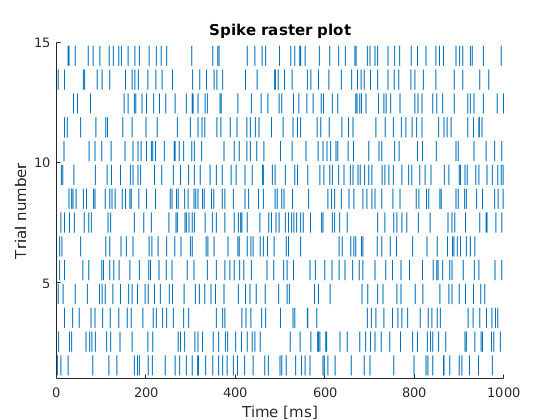

In [58]:
%Raster plot some spikes to visualize the proccess of spiking
%We use the variable num_trial defined above
axes('position', [0.1, 0.1, 0.8, 0.8]);
axis([0, length(inh_spikes), 1, num_trial]);
set(gca, 'YTick', 0:5:num_trial); %Set the y-axis numbers to integers
ticMargin = num_trial*0.01; %Gap between spike trains
ticHeight = (num_trial - (num_trial + 1) * ticMargin) / num_trial;

for train = 1:num_trial
    spikeTimes = find(inh_spikes(train, :) == 1);
    yOffset = ticMargin + (train - 1) * (ticMargin + ticHeight);
    for i = 1:length(spikeTimes)
        line([spikeTimes(i), spikeTimes(i)], [yOffset, yOffset + ticHeight]);
    end
end

xlabel('Time [ms]');
ylabel('Trial number');
title('Spike raster plot');

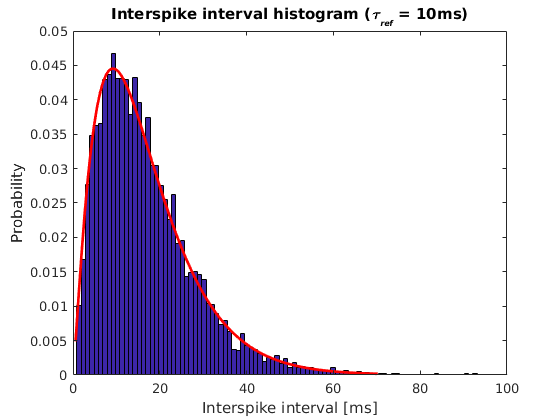

In [84]:
hData = histfit(spk_int, ceil(max(spk_int)), 'gamma'); %Create the histogram and also draw the fitting curve

%Change from frequency to probability
hData(1).YData = hData(1).YData/length(spk_int);
hData(2).YData = hData(2).YData/length(spk_int);

a = axis; %Get the current axis values
axis([0 100 a(3) roundn(max(hData(1).YData), -2)]); %Set the axis limits

title('Interspike interval histogram (\tau_{\fontsize{6}\it{ref}} = 10ms)');
xlabel('Interspike interval [ms]');
ylabel('Probability');

In [65]:
pd = fitdist((spk_int'), 'gamma') %Get the fit parameters for the fitted curve in the histogram above


pd = 

  GammaDistribution

  Gamma distribution
    a = 2.22928   [2.15584, 2.30522]
    b = 7.49423   [7.21803, 7.78099]



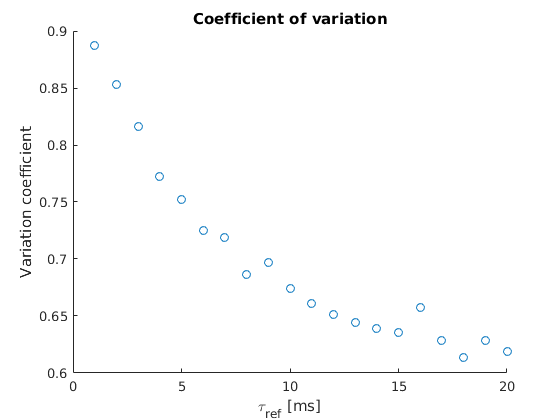

In [104]:
scatter(1:20, cv)

title('Coefficient of variation');
xlabel('\tau_{ref} [ms]');
ylabel('Variation coefficient');